### Libraries and Data Loading

In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data from drive
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TB Final Data/tb_drug_data_minmax.csv')

Mounted at /content/drive


### Control Cases

In [3]:
X = df.drop('TB Type', axis=1)
X.rename(columns={'Cough >=2 weeks':'Cough gte 2 week', 'Cough <2 weeks':'Cough lt 2 weeks'}, inplace=True)
y = df['TB Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Random Forest Classifier Control
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.08      0.02      0.03        52
         1.0       0.00      0.00      0.00        21
         2.0       0.00      0.00      0.00        21
         3.0       0.69      0.95      0.80       212

    accuracy                           0.66       306
   macro avg       0.19      0.24      0.21       306
weighted avg       0.49      0.66      0.56       306

[[  1   0   0  51]
 [  1   0   0  20]
 [  1   0   0  20]
 [ 10   0   1 201]]


In [25]:
# XGBoost Classifier Control
xg_clf = XGBClassifier(random_state=42)
xg_clf.fit(X_train, y_train)

y_pred = xg_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.10      0.04      0.06        52
         1.0       0.00      0.00      0.00        21
         2.0       0.33      0.10      0.15        21
         3.0       0.71      0.92      0.80       212

    accuracy                           0.65       306
   macro avg       0.28      0.26      0.25       306
weighted avg       0.53      0.65      0.57       306

[[  2   2   3  45]
 [  3   0   0  18]
 [  1   0   2  18]
 [ 14   3   1 194]]


In [27]:
# SVM Classifier Control
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        52
         1.0       0.00      0.00      0.00        21
         2.0       0.00      0.00      0.00        21
         3.0       0.69      1.00      0.82       212

    accuracy                           0.69       306
   macro avg       0.17      0.25      0.20       306
weighted avg       0.48      0.69      0.57       306

[[  0   0   0  52]
 [  0   0   0  21]
 [  0   0   0  21]
 [  0   0   0 212]]


### SMOTE Minority

In [11]:
smote = SMOTE(random_state=42, k_neighbors=5, sampling_strategy='minority')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        52
         1.0       0.00      0.00      0.00        21
         2.0       0.00      0.00      0.00        21
         3.0       0.69      0.96      0.80       212

    accuracy                           0.66       306
   macro avg       0.17      0.24      0.20       306
weighted avg       0.48      0.66      0.56       306

[[  0   1   1  50]
 [  0   0   0  21]
 [  1   1   0  19]
 [  6   3   0 203]]


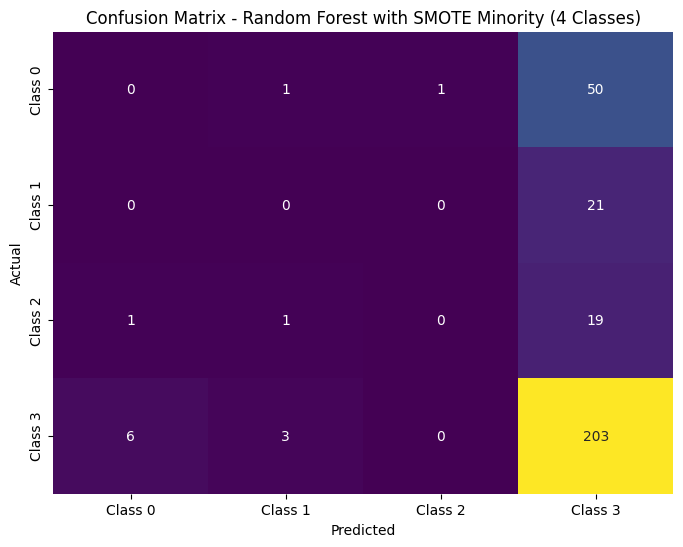

In [12]:
# Random Forest Smote Minority
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train_resampled, y_train_resampled)

y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest with SMOTE Minority (4 Classes)')
plt.show()

In [54]:
# XGBoost Smote Minority
xg_clf = XGBClassifier(random_state=42, n_estimators=100)
xg_clf.fit(X_train_resampled, y_train_resampled)

y_pred = xg_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.15      0.08      0.10        52
         1.0       0.22      0.10      0.13        21
         2.0       0.14      0.05      0.07        21
         3.0       0.70      0.87      0.78       212

    accuracy                           0.63       306
   macro avg       0.30      0.27      0.27       306
weighted avg       0.54      0.63      0.57       306

[[  4   1   2  45]
 [  2   2   1  16]
 [  2   0   1  18]
 [ 18   6   3 185]]


In [55]:
# SVM Smote Minority
svm_clf = SVC(random_state=42, kernel='linear')
svm_clf.fit(X_train_resampled, y_train_resampled)

y_pred = svm_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        52
         1.0       0.09      0.48      0.15        21
         2.0       0.00      0.00      0.00        21
         3.0       0.72      0.67      0.69       212

    accuracy                           0.50       306
   macro avg       0.20      0.29      0.21       306
weighted avg       0.51      0.50      0.49       306

[[  0  20   0  32]
 [  0  10   0  11]
 [  0   9   0  12]
 [  0  70   0 142]]


### SMOTE Not-Majority

In [7]:
smote = SMOTE(random_state=42, k_neighbors=5, sampling_strategy='not majority')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [61]:
# RandomForest not Majority
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train_resampled, y_train_resampled)

y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.15      0.08      0.10        52
         1.0       0.00      0.00      0.00        21
         2.0       0.14      0.05      0.07        21
         3.0       0.72      0.90      0.80       212

    accuracy                           0.64       306
   macro avg       0.25      0.26      0.24       306
weighted avg       0.53      0.64      0.57       306

[[  4   1   4  43]
 [  5   0   1  15]
 [  2   0   1  18]
 [ 16   4   1 191]]


              precision    recall  f1-score   support

         0.0       0.15      0.08      0.10        52
         1.0       0.22      0.10      0.13        21
         2.0       0.14      0.05      0.07        21
         3.0       0.70      0.87      0.78       212

    accuracy                           0.63       306
   macro avg       0.30      0.27      0.27       306
weighted avg       0.54      0.63      0.57       306

[[  4   1   2  45]
 [  2   2   1  16]
 [  2   0   1  18]
 [ 18   6   3 185]]


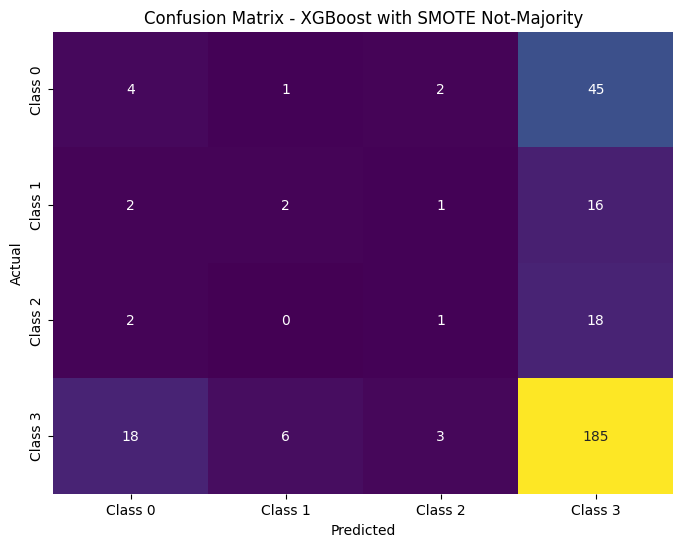

In [13]:
# XGBoost not Majority
xg_clf = XGBClassifier(random_state=42, n_estimators=100)
xg_clf.fit(X_train_resampled, y_train_resampled)

y_pred = xg_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost with SMOTE Not-Majority')
plt.show()

In [63]:
# SVM not majority
svm_clf = SVC(random_state=42, kernel='linear')
svm_clf.fit(X_train_resampled, y_train_resampled)

y_pred = svm_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.15      0.23      0.18        52
         1.0       0.10      0.33      0.15        21
         2.0       0.05      0.19      0.07        21
         3.0       0.69      0.23      0.34       212

    accuracy                           0.23       306
   macro avg       0.25      0.25      0.19       306
weighted avg       0.51      0.23      0.28       306

[[12 13 12 15]
 [ 4  7  7  3]
 [ 6  7  4  4]
 [57 44 63 48]]


### SMOTE Specific Techniques

In [75]:
ratio = 0.8
n_majority = y_train.value_counts().max()
sampling_strategy_custom = {
    0.0: int(n_majority * ratio),
    1.0: int(n_majority * ratio),
    2.0: int(n_majority * ratio)
}

smote = SMOTE(random_state=42, k_neighbors=5, sampling_strategy=sampling_strategy_custom)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [76]:
# RandomForest
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train_resampled, y_train_resampled)

y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.10      0.04      0.06        52
         1.0       0.00      0.00      0.00        21
         2.0       0.00      0.00      0.00        21
         3.0       0.71      0.92      0.80       212

    accuracy                           0.64       306
   macro avg       0.20      0.24      0.21       306
weighted avg       0.51      0.64      0.56       306

[[  2   0   4  46]
 [  4   0   1  16]
 [  2   3   0  16]
 [ 12   4   2 194]]


In [77]:
# XGBoost
xg_clf = XGBClassifier(random_state=42, n_estimators=100)
xg_clf.fit(X_train_resampled, y_train_resampled)

y_pred = xg_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.16      0.06      0.08        52
         1.0       0.29      0.10      0.14        21
         2.0       0.29      0.10      0.14        21
         3.0       0.70      0.91      0.79       212

    accuracy                           0.65       306
   macro avg       0.36      0.29      0.29       306
weighted avg       0.55      0.65      0.58       306

[[  3   0   2  47]
 [  3   2   0  16]
 [  1   0   2  18]
 [ 12   5   3 192]]


In [78]:
# SVM
svm_clf = SVC(random_state=42, kernel='linear')
svm_clf.fit(X_train_resampled, y_train_resampled)

y_pred = svm_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.17      0.10      0.12        52
         1.0       0.11      0.29      0.16        21
         2.0       0.07      0.24      0.11        21
         3.0       0.72      0.53      0.61       212

    accuracy                           0.42       306
   macro avg       0.27      0.29      0.25       306
weighted avg       0.54      0.42      0.46       306

[[  5  11  11  25]
 [  2   6   5   8]
 [  2   4   5  10]
 [ 21  32  47 112]]


### ADASYN Minority

In [79]:
# ADASYN with minority strategy
adasyn = ADASYN(random_state=42, sampling_strategy='minority')
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

In [80]:
# Random Forest with ADASYN Minority
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train_resampled, y_train_resampled)

y_pred = rf_clf.predict(X_test)
print("Random Forest with ADASYN Minority:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Random Forest with ADASYN Minority:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        52
         1.0       0.00      0.00      0.00        21
         2.0       0.00      0.00      0.00        21
         3.0       0.70      0.96      0.81       212

    accuracy                           0.67       306
   macro avg       0.18      0.24      0.20       306
weighted avg       0.49      0.67      0.56       306

[[  0   1   0  51]
 [  2   0   0  19]
 [  2   2   0  17]
 [  5   3   0 204]]


In [81]:
# XGBoost with ADASYN Minority
xg_clf = XGBClassifier(random_state=42, n_estimators=100)
xg_clf.fit(X_train_resampled, y_train_resampled)

y_pred = xg_clf.predict(X_test)
print("XGBoost with ADASYN Minority:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

XGBoost with ADASYN Minority:
              precision    recall  f1-score   support

         0.0       0.11      0.04      0.06        52
         1.0       0.17      0.05      0.07        21
         2.0       0.00      0.00      0.00        21
         3.0       0.70      0.91      0.79       212

    accuracy                           0.64       306
   macro avg       0.24      0.25      0.23       306
weighted avg       0.51      0.64      0.56       306

[[  2   2   2  46]
 [  2   1   0  18]
 [  1   0   0  20]
 [ 13   3   4 192]]


In [82]:
# SVM with ADASYN Minority
svm_clf = SVC(random_state=42, kernel='linear')
svm_clf.fit(X_train_resampled, y_train_resampled)

y_pred = svm_clf.predict(X_test)
print("SVM with ADASYN Minority:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

SVM with ADASYN Minority:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        52
         1.0       0.09      0.48      0.15        21
         2.0       0.00      0.00      0.00        21
         3.0       0.70      0.64      0.67       212

    accuracy                           0.47       306
   macro avg       0.20      0.28      0.20       306
weighted avg       0.49      0.47      0.47       306

[[  0  19   0  33]
 [  0  10   0  11]
 [  0   8   0  13]
 [  0  77   0 135]]


### ADASYN Not-Majority

In [83]:
# ADASYN with not majority strategy
adasyn = ADASYN(random_state=42, sampling_strategy='not majority')
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

In [84]:
# Random Forest Not Majority
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train_resampled, y_train_resampled)

y_pred = rf_clf.predict(X_test)
print("Random Forest with ADASYN Not Majority:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Random Forest with ADASYN Not Majority:
              precision    recall  f1-score   support

         0.0       0.22      0.10      0.13        52
         1.0       0.00      0.00      0.00        21
         2.0       0.14      0.05      0.07        21
         3.0       0.71      0.92      0.80       212

    accuracy                           0.65       306
   macro avg       0.27      0.26      0.25       306
weighted avg       0.54      0.65      0.58       306

[[  5   1   3  43]
 [  2   0   1  18]
 [  2   0   1  18]
 [ 14   2   2 194]]


In [85]:
# XGBoost Not Majority
xg_clf = XGBClassifier(random_state=42, n_estimators=100)
xg_clf.fit(X_train_resampled, y_train_resampled)

y_pred = xg_clf.predict(X_test)
print("XGBoost with ADASYN Not Majority:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

XGBoost with ADASYN Not Majority:
              precision    recall  f1-score   support

         0.0       0.05      0.02      0.03        52
         1.0       0.20      0.05      0.08        21
         2.0       0.25      0.10      0.14        21
         3.0       0.69      0.89      0.78       212

    accuracy                           0.63       306
   macro avg       0.30      0.26      0.26       306
weighted avg       0.52      0.63      0.56       306

[[  1   0   3  48]
 [  3   1   0  17]
 [  1   0   2  18]
 [ 17   4   3 188]]


In [86]:
# SVM Not Majority
svm_clf = SVC(random_state=42, kernel='linear')
svm_clf.fit(X_train_resampled, y_train_resampled)

y_pred = svm_clf.predict(X_test)
print("SVM with ADASYN Not Majority:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

SVM with ADASYN Not Majority:
              precision    recall  f1-score   support

         0.0       0.16      0.21      0.18        52
         1.0       0.10      0.33      0.16        21
         2.0       0.04      0.19      0.07        21
         3.0       0.71      0.24      0.35       212

    accuracy                           0.24       306
   macro avg       0.25      0.24      0.19       306
weighted avg       0.53      0.24      0.29       306

[[11 15 14 12]
 [ 3  7  8  3]
 [ 5  7  4  5]
 [51 38 73 50]]


### ADASYN Sampling Technique

In [14]:
ratio = 0.5
n_majority = y_train.value_counts().max()
sampling_strategy_custom = {
    0.0: int(n_majority * ratio),
    1.0: int(n_majority * ratio),
    2.0: int(n_majority * ratio)
}

# ADASYN with custom sampling strategy
adasyn = ADASYN(random_state=42, sampling_strategy=sampling_strategy_custom)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

Random Forest with ADASYN Custom:
              precision    recall  f1-score   support

         0.0       0.10      0.02      0.03        52
         1.0       0.00      0.00      0.00        21
         2.0       0.14      0.05      0.07        21
         3.0       0.71      0.95      0.81       212

    accuracy                           0.66       306
   macro avg       0.24      0.25      0.23       306
weighted avg       0.52      0.66      0.57       306

[[  1   1   2  48]
 [  2   0   1  18]
 [  1   1   1  18]
 [  6   2   3 201]]


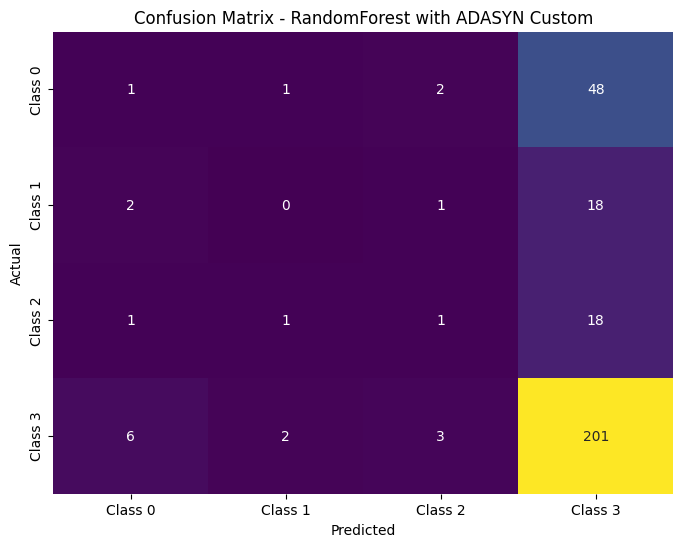

In [16]:
# Random Forest Custom Strategy
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train_resampled, y_train_resampled)

y_pred = rf_clf.predict(X_test)
print("Random Forest with ADASYN Custom:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - RandomForest with ADASYN Custom')
plt.show()

In [94]:
# XGBoost with ADASYN Custom Strategy
xg_clf = XGBClassifier(random_state=42, n_estimators=100)
xg_clf.fit(X_train_resampled, y_train_resampled)

y_pred = xg_clf.predict(X_test)
print("XGBoost with ADASYN Custom:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

XGBoost with ADASYN Custom:
              precision    recall  f1-score   support

         0.0       0.23      0.12      0.15        52
         1.0       0.00      0.00      0.00        21
         2.0       0.00      0.00      0.00        21
         3.0       0.69      0.88      0.77       212

    accuracy                           0.63       306
   macro avg       0.23      0.25      0.23       306
weighted avg       0.52      0.63      0.56       306

[[  6   1   2  43]
 [  1   0   0  20]
 [  0   0   0  21]
 [ 19   3   3 187]]


In [95]:
# SVM with ADASYN Custom Strategy
svm_clf = SVC(random_state=42, kernel='linear')
svm_clf.fit(X_train_resampled, y_train_resampled)

y_pred = svm_clf.predict(X_test)
print("SVM with ADASYN Custom:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

SVM with ADASYN Custom:
              precision    recall  f1-score   support

         0.0       0.11      0.02      0.03        52
         1.0       0.14      0.19      0.16        21
         2.0       0.00      0.00      0.00        21
         3.0       0.70      0.89      0.78       212

    accuracy                           0.63       306
   macro avg       0.24      0.27      0.24       306
weighted avg       0.51      0.63      0.56       306

[[  1   5   0  46]
 [  0   4   0  17]
 [  2   2   0  17]
 [  6  18   0 188]]


### Summary Table

| **Oversampler**       | **Sampling Strategy** | **Classifier**       | **Accuracy** | **Macro F1-Score** | **Weighted F1-Score** |
|------------------------|-----------------------|----------------------|--------------|--------------------|-----------------------|
| **SMOTE**             | Minority              | Random Forest        | 0.66         | 0.20               | 0.56                  |
| **SMOTE**             | Minority              | XGBoost              | 0.63         | 0.27               | 0.57                  |
| **SMOTE**             | Minority              | SVM                  | 0.50         | 0.21               | 0.49                  |
| **SMOTE**             | Not Majority          | Random Forest        | 0.64         | 0.24               | 0.57                  |
| **SMOTE**             | Not Majority          | XGBoost              | 0.64         | 0.27               | 0.57                  |
| **SMOTE**             | Not Majority          | SVM                  | 0.23         | 0.19               | 0.28                  |
| **SMOTE**             | Custom (0.8 ratio)    | Random Forest        | 0.64         | 0.21               | 0.56                  |
| **SMOTE**             | Custom (0.8 ratio)    | XGBoost              | 0.65         | 0.29               | 0.58                  |
| **SMOTE**             | Custom (0.8 ratio)    | SVM                  | 0.42         | 0.25               | 0.46                  |
| **ADASYN**            | Minority              | Random Forest        | 0.67         | 0.20               | 0.56                  |
| **ADASYN**            | Minority              | XGBoost              | 0.64         | 0.23               | 0.56                  |
| **ADASYN**            | Minority              | SVM                  | 0.47         | 0.20               | 0.47                  |
| **ADASYN**            | Not Majority          | Random Forest        | 0.65         | 0.25               | 0.58                  |
| **ADASYN**            | Not Majority          | XGBoost              | 0.63         | 0.26               | 0.56                  |
| **ADASYN**            | Not Majority          | SVM                  | 0.24         | 0.19               | 0.29                  |
| **ADASYN**            | Custom (0.5 ratio)    | Random Forest        | 0.66         | 0.23               | 0.57                  |
| **ADASYN**            | Custom (0.5 ratio)    | XGBoost              | 0.63         | 0.23               | 0.56                  |
| **ADASYN**            | Custom (0.5 ratio)    | SVM                  | 0.63         | 0.24               | 0.56                  |